In [69]:
from hydra import compose, initialize
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with initialize(version_base=None, config_path="../configs/filepaths"):
    filepaths = compose(config_name="filepaths")

In [70]:
rule_id = "decarb"
cov = pd.read_csv(
    Path(filepaths.interim_data) / rule_id / "coverage.csv",
)
put = pd.read_csv(
    Path(filepaths.interim_data) / rule_id / "putative.csv",
)
cov.head()

,scl_lb,mech_id,max_coverage,mean_extra_atoms,std_extra_atoms
0,5,0,1.000000,4.72,1.510497
1,5,1,0.666667,0.00,0.000000
2,5,2,0.750000,0.00,0.000000
3,5,3,0.500000,0.00,0.000000
4,5,4,0.600000,0.00,0.000000


In [71]:
put.head(15)

,scl_lb,n_novel_subgraphs,n_total_inferred
0,5,19,59
1,7,11,47
2,10,10,33
3,12,4,25
4,15,2,7
5,20,1,3
6,25,1,3
7,30,2,2
8,35,0,0
9,40,0,0


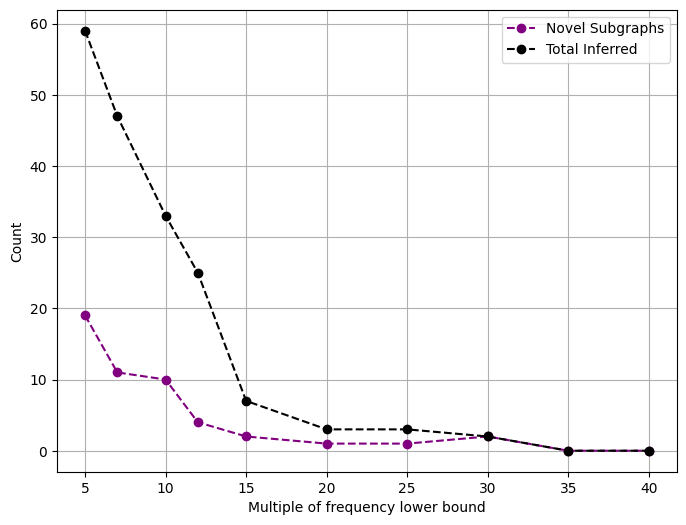

In [72]:

plt.figure(figsize=(8, 6))
plt.plot(put["scl_lb"], put["n_novel_subgraphs"], color='purple', ls='--', marker='o', label="Novel Subgraphs")
plt.plot(put["scl_lb"], put["n_total_inferred"], color='black', ls='--', marker='o', label="Total Inferred")

plt.xlabel("Multiple of frequency lower bound")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

In [73]:
# Grouping the cov dataframe by 'scl_lb' and calculating mean and standard deviation
aggregated_data = cov[cov["max_coverage"] == 1].groupby('scl_lb').agg(
    extra_atoms_mean=('mean_extra_atoms', 'mean'),
    extra_atoms_std=('mean_extra_atoms', 'std'),
    n_mechs_covered=('max_coverage', 'count'),
).reset_index()
aggregated_data.head()

,scl_lb,extra_atoms_mean,extra_atoms_std,n_mechs_covered
0,5,4.335238,0.598986,9
1,7,3.571429,0.411361,9
2,10,3.371882,0.186659,7
3,12,3.170635,0.074239,7
4,15,2.200000,0.000000,3


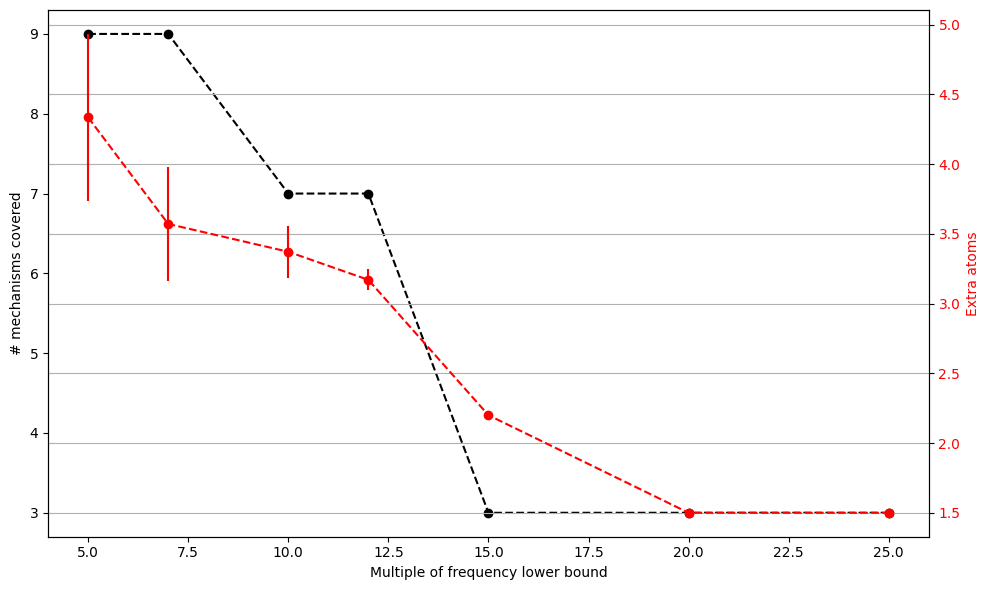

In [74]:

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot max_coverage with error bars
ax1.errorbar(
    aggregated_data['scl_lb'], 
    aggregated_data['n_mechs_covered'],
    fmt='o--', 
    label='Max Coverage', 
    color='black'
)
ax1.set_xlabel('Multiple of frequency lower bound')
ax1.set_ylabel('# mechanisms covered', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for mean_extra_atoms
ax2 = ax1.twinx()
ax2.errorbar(
    aggregated_data['scl_lb'], 
    aggregated_data['extra_atoms_mean'],
    yerr=aggregated_data['extra_atoms_std'],
    fmt='o--', 
    label='Extra atoms', 
    color='red'
)
ax2.set_ylabel('Extra atoms', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding grid and title
fig.tight_layout()
plt.grid(True)
plt.show()